# G0234 - Assignmenrt - Section B - World Disaster Risk Dataset Analysis
### --Powerful Creativity


## Table of Content

* 1. [Introduction](#1-Introduction)<br>
    * 1.1 [Introduce the topic](#11-introduce-the-topic) <br>
    * 1.2 [Research questions](#12-research-questions)<br>
    * 1.3 [Objective / purpose](#13-objective--purpose)<br>    
* 2. [Dataset Description and Reference](#2-dataset-description-and-reference)<br>
* 3. [Descriptive with Code](#3-descriptive-with-code) <br>
    * 3.1 [Dataset feature description](#31-dataset-feature-description)<br>
    * 3.2 [Preprocess the data](#32-preprocess-the-data)<br>
    * 3.3 [Data structure](#33-data-structure)<br>
    * 3.4 [Summary table](#34-summary-table)
    * 3.5 [Data visualization for showing data distribution](#35-data-visualization-for-showing-data-distribution)
* 4.[Analysis](#4-analysis)<br>
    * 4.1 [For Question: What are correlations between different variables like?](#41-for-question-what-are-correlations-between-different-variables-like)
    * 4.2 [t-Test](#42-t-test)
    * 4.3 [Linear Regression](#43-linear-regression)
    * 4.4 [Data Visualization for Analysis](#44-data-visualization-for-analysis)
        * 4.4.1 [For Question: How does WRI change over time?](#441-for-question-how-has-the-global-disaster-risk-index-changed-over-time-are-there-any-patterns-or-trends-in-the-data)
        * 4.4.2 [For Question: Which is most/least vunerable region?](#442-for-question-which-regions-are-most--least-vulnerable-to-natural-disasters)
    * 4.5 [Machine learning models to predict likelihood](#45-machine-learning-models-to-predict-likelihood)
    * 4.6 [Other analysis](#46-other-analysis)
* 5.[Conclusion / Findings](#5-conclusion--findings)

# 1. Introduction

### <b>1.1 Introduce the topic</b><a class="anchor" id="11-introduce-the-topic"></a>

Natural disasters can have devastating consequences, which cause loss of life and significant economic damage. Understanding the risk of such events mentioned in the dataset is crucial for effective disaster preparedness and response. We will analyze information included in the dataset on the risk and exposure to natural hazards, vulnerability and susceptibility, coping capacities, and adaptive capacities for regions around the globe.

In this analysis, we will be examining the world risk score for each region, which takes into account the region's risk and exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea level rise. We will also be analyzing the vulnerability and susceptibility of each region, which depend on factors such as infrastructure, nutrition, housing situation, and economic framework conditions. Additionally, we will be examining coping capacities, which include governance, preparedness and early warning, medical care, and social and material security, as well as adaptive capacities related to natural events, climate change, and other challenges.

By analyzing this dataset, we hope to gain a better understanding of the global patterns of disaster risk and the factors that contribute to them. This knowledge can help inform efforts to improve disaster preparedness and response, reduce vulnerability and susceptibility, and build coping and adaptive capacities to mitigate the impacts of natural disasters. 

In the following part, we will briefly introduce how we consider the world disaster risk problems and how we analyze the dataset to get what we want to know.

### <b>1.2 Research questions</b><a class="anchor" id="12-research-questions"></a>

<p>In this dataset analysis, we're going to express the following questions:
<ul>
    <li>Which regions are most / least vulnerable to natural disasters</li>
    <li>Correlations between different variables</li>
    <li>Relationship between the disaster risk and economy development (or other factors like population size) of a region</li>
    <li>How has the global disaster risk index changed over time? Are there any patterns or trends in the data</li>
    <li>What are the most important factors contributing to disaster risk and preparedness in different regions</li>
    <li>Can machine learning models be trained to predict the likelihood of a region experiencing a natural disaster based on historical data</li>
</ul>

### <b>1.3 Objective / purpose</b><a class="anchor" id="13-objective--purpose"></a>

<p>In this dataset analysis, our objectives includes:
<ul>
    <li>Identify the regions that are most and least vulnerable to natural disasters.</li>
    <li>Investigate correlations between different variables in the dataset.</li>
    <li>Examine the relationship between disaster risk and economic development.</li>
    <li>Analyze changes in the global disaster risk index over time to identify patterns and trends in the data.</li>
    <li>Determine the most important factors contributing to disaster risk and preparedness in different regions</li>
    <li>Explore the potential for machine learning models to predict the likelihood of a region experiencing a natural disaster.</li>
</ul>
<br>

# 2. Dataset Description and Reference

### <b>2.1 Introduce the dataset</b>

<p> The "World Disaster Risk Dataset" from Kaggle is a comprehensive dataset that provides insights into trends in global disaster risk over time. The dataset contains a total of <b> 12 columns and 1917 rows</b> of data, and mainly covers a 11-year time period from 2011 to 2021, and uses 27 aggregated, publicly available indicators to determine disaster risk for 181 countries around the world.
<p> The dataset contains information on several key indicators, including WRI (World Risk Score of the region), Exposure, Vulnerability, and Susceptibility for each country. In addition, it includes data on specific types of natural disasters, such as floods, earthquakes, and hurricanes. The dataset is structured in a time-series format (year-specific), allowing us to analyze trends and patterns in disaster risk over time.
<p> The dataset can be used to train machine learning models to assess the effectiveness of disaster risk reduction measures and inform policy decisions aimed at reducing the impact of disasters on communities and economies around the world.

### <b> 2.2 Dataset Source </b>
<ul>
    <li>https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset</li>
</ul>

### <b> 2.3 Reference </b>
<ul>
    <li>
        https://www.kaggle.com/code/vibhuti25/world-risk-analysis
    </li>
</ul>
<br>

# 3. Descriptive with Code

Load main Python libraries

In [2]:
# need to execute commands 'pip install numpy/pandas/seaborn/scipy' in CMD when running in VS Code editor
import numpy as np # import NumPy library for numerical computing
import pandas as pd # import Pandas library for data manipulation
import seaborn as sns # import Seaborn library for data visualization
import matplotlib.pyplot as plt # import pyplot module from Matplotlib library for creating plots
import math # provide standard mathematical constants and functions
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.unicode_minus'] = False # display the minus sign
plt.rcParams.update({'font.size': 16}) # increase fontsize of plots
plt.rc('font', family = 'Times New Roman') # set the font of plots to Times New Roman

# render plots into output cells directly
%matplotlib inline

# # import ipyleaflet
# import ipyleaflet as ipyl
# from ipywidgets import HTML
# from IPython.display import display

# # create Geocoder 
# import geopy
# from geopy.geocoders import Nominatim

Load the dataset

In [3]:
disaster_risk = pd.read_csv("world_risk_index.csv", na_values = '?') # load the CSV file into a dataframe
disaster_risk # print dataframe

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Grenada,1.42,3.13,45.39,24.54,68.82,42.82,2016,Very Low,Very Low,Medium,Medium
1913,Barbados,1.32,3.46,38.26,18.20,50.29,46.29,2016,Very Low,Very Low,Low,Low
1914,Saudi Arabia,1.14,2.93,38.96,14.80,65.01,37.07,2016,Very Low,Very Low,Low,Very Low
1915,Malta,0.60,1.65,36.25,15.97,59.33,33.44,2016,Very Low,Very Low,Low,Very Low


### <b>3.1 Dataset feature description</b><a class="anchor" id="31-dataset-feature-description"></a>


<table>
    <tr>
        <th>Feature Name</th>
        <th>Data Type</th>
        <th>Feature Description</th>
    </tr>
    <tr>
        <td>Region</td>
        <td>String</td>
        <td>Name of the region</td>
    </tr>
    <tr>
        <td>WRI</td>
        <td>Decimal</td>
        <td>World risk score of the specific region</td>
    </tr>
    <tr>
        <td>Exposure</td>
        <td>Decimal</td>
        <td>Exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise</td>
    </tr>
    <tr>
        <td>Vulnerability</td>
        <td>Decimal</td>
        <td>Depending on infrastructure, nutrition, housing situation, and economic framework conditions</td>
    </tr>
    <tr>
        <td>Susceptibility</td>
        <td>Decimal</td>
        <td>Depending on infrastructure, nutrition, housing situation, and economic framework conditions</td>
    </tr>
    <tr>
        <td>Lack of Coping Capabilities</td>
        <td>Decimal</td>
        <td>Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security</td>
    </tr>
    <tr>
        <td>Lack of Adaptive Capabilities</td>
        <td>Decimal</td>
        <td>Adaptive capacities related to coming natural events, climate change, and other challenges</td>
    </tr>
    <tr>
        <td>Year</td>
        <td>String</td>
        <td>Year data is being described</td>
    </tr>
    <tr>
        <td>WRI Category</td>
        <td>String</td>
        <td>WRI Category for the given WRI Score</td>
    </tr>
    <tr>
        <td>Exposure Category</td>
        <td>String</td>
        <td>Exposure Category for the given Exposure Score</td>
    </tr>
    <tr>
        <td>Vulnerability Category</td>
        <td>String</td>
        <td>Vulnerability Category for the given Vulnerability Score</td>
    </tr>
    <tr>
        <td>Susceptibility Category</td>
        <td>String</td>
        <td>Susceptibility Category for the given Susceptibility Score</td>
    </tr>
</table>

In [4]:
disaster_risk['Year'] = disaster_risk['Year'].astype('str') # convert the data type of 'Year' from integer to string

### <b> 3.2 Preprocess the data<a class="anchor" id="32-preprocess-the-data"></a>

<b>3.2.1 Missing data handling</b>

<p>* Missing values may cause errors and bias in statistical analysis and modeling

In [5]:
disaster_risk.info() # display dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   object 
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), object(6)
memory usage: 179.8+ KB


In [6]:
print(disaster_risk.isnull().sum()) # display the total amount of missing values for each column
print('\nNumber of missing values: ', disaster_risk.isna().sum().sum()) # calculate the sum of the number of missing values

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

Number of missing values:  6


In [7]:
# filter out all rows with missing values (NaN)
disaster_risk[disaster_risk[[' Lack of Adaptive Capacities', 'WRI Category', 'Vulnerability Category']].isnull().values == True]
# disaster_risk[pd.isnull(disaster_risk).any(axis=1)]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1193,Österreich,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low
1202,Deutschland,2.43,11.51,21.11,14.30,36.44,12.60,2019,Low,Very Low,NaN,Very Low
1205,Norwegen,2.34,10.60,22.06,13.29,39.21,13.68,2019,Low,Very Low,NaN,Very Low
1292,Föd. Staaten v. Mikronesien,7.59,14.95,50.77,31.79,72.13,48.39,2020,High,NaN,High,High
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High


<b>3.2.2 Data removal</b>

<p>* The percentage of missing data is low, thus the removal method is applied.</li>

In [8]:
disaster_risk = disaster_risk.dropna() # delete all rows containing missing data and return a new dataframe object
disaster_risk.isnull().any() # check each column for null values

Region                          False
WRI                             False
Exposure                        False
Vulnerability                   False
Susceptibility                  False
Lack of Coping Capabilities     False
 Lack of Adaptive Capacities    False
Year                            False
Exposure Category               False
WRI Category                    False
Vulnerability Category          False
Susceptibility Category         False
dtype: bool

### <b> 3.3 Data structure<a class="anchor" id="33-data-structure"></a>

<b> 3.3.1 Head after removing missing data

In [9]:
disaster_risk.head() # return the first 5 rows (param is not specified)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


<b>3.3.2 Tail after removing missing data

In [10]:
disaster_risk.tail() # return the last 5 rows (param is not specified)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1912,Grenada,1.42,3.13,45.39,24.54,68.82,42.82,2016,Very Low,Very Low,Medium,Medium
1913,Barbados,1.32,3.46,38.26,18.20,50.29,46.29,2016,Very Low,Very Low,Low,Low
1914,Saudi Arabia,1.14,2.93,38.96,14.80,65.01,37.07,2016,Very Low,Very Low,Low,Very Low
1915,Malta,0.60,1.65,36.25,15.97,59.33,33.44,2016,Very Low,Very Low,Low,Very Low
1916,Qatar,0.08,0.28,28.18,9.68,43.94,30.93,2016,Very Low,Very Low,Very Low,Very Low


<b> 3.3.3 Number of rows and columns with valid no missing data

In [11]:
print(len(disaster_risk))
print(disaster_risk.shape) # number of rows and columns of the dataframe

# dimension of the dataframe : No. of rows and columns
print("Number of rows: ",disaster_risk.shape[0])
print("Number of columns: ",disaster_risk.shape[1])

1912
(1912, 12)
Number of rows:  1912
Number of columns:  12


<b> 3.3.4 Names of each columns 

In [12]:
disaster_risk.keys() # returns index object with column names
# disaster_risk.columns

Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

<b> 3.3.5 Type of each columns

In [13]:
disaster_risk.dtypes # data type of each column

Region                           object
WRI                             float64
Exposure                        float64
Vulnerability                   float64
Susceptibility                  float64
Lack of Coping Capabilities     float64
 Lack of Adaptive Capacities    float64
Year                             object
Exposure Category                object
WRI Category                     object
Vulnerability Category           object
Susceptibility Category          object
dtype: object

<b> 3.3.6 Brief information of complete and valid data

In [14]:
disaster_risk.info() # info about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1912 non-null   object 
 1   WRI                           1912 non-null   float64
 2   Exposure                      1912 non-null   float64
 3   Vulnerability                 1912 non-null   float64
 4   Susceptibility                1912 non-null   float64
 5   Lack of Coping Capabilities   1912 non-null   float64
 6    Lack of Adaptive Capacities  1912 non-null   float64
 7   Year                          1912 non-null   object 
 8   Exposure Category             1912 non-null   object 
 9   WRI Category                  1912 non-null   object 
 10  Vulnerability Category        1912 non-null   object 
 11  Susceptibility Category       1912 non-null   object 
dtypes: float64(6), object(6)
memory usage: 194.2+ KB


In [15]:
np.sort(disaster_risk['Year'].unique()) # deal with the single column 'Year' and return all unique elements

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'], dtype=object)

### <b>3.4 Summary table<a class="anchor" id="34-summary-table"></a>

In [16]:
disaster_risk.describe() # generate descriptive statistics

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
mean,7.555758,15.386182,48.133488,30.757286,70.508138,43.135152
std,5.554435,10.246345,13.792223,15.668835,14.977959,13.511757
min,0.020000,0.050000,20.970000,8.260000,35.160000,11.160000
25%,3.757500,10.115000,37.100000,17.807500,59.430000,33.217500
50%,6.525000,12.760000,47.105000,25.415000,74.230000,43.095000
75%,9.402500,16.450000,60.180000,42.702500,83.022500,53.082500
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000


<p>Observation of summary table:

<ul>
    <li>The average value of the global WRI is 7.555758 (Medium Category), the lowest value is 0.02, and the highest value is 56.71</li>
    <li>The average value of the global Exposure is 15.386182 (High Category), the lowest value is 0.05, and the highest value is 99.88</li>
    <li>The average value of the global Vulnerability is 48.133488 (Medium Category), the lowest value is 20.97, and the highest value is 76.47</li>
    <li>The average value of the global Susceptibility is 30.757286 (High Category), the lowest value is 8.26, and the highest value is 70.83</li>
</ul>
<br>

### <b> 3.5 Data visualization for showing data distribution<a class="anchor" id="35-data-visualization-for-showing-data-distribution"></a>

<b>Histogram: Visualize the distribution of numeric variables

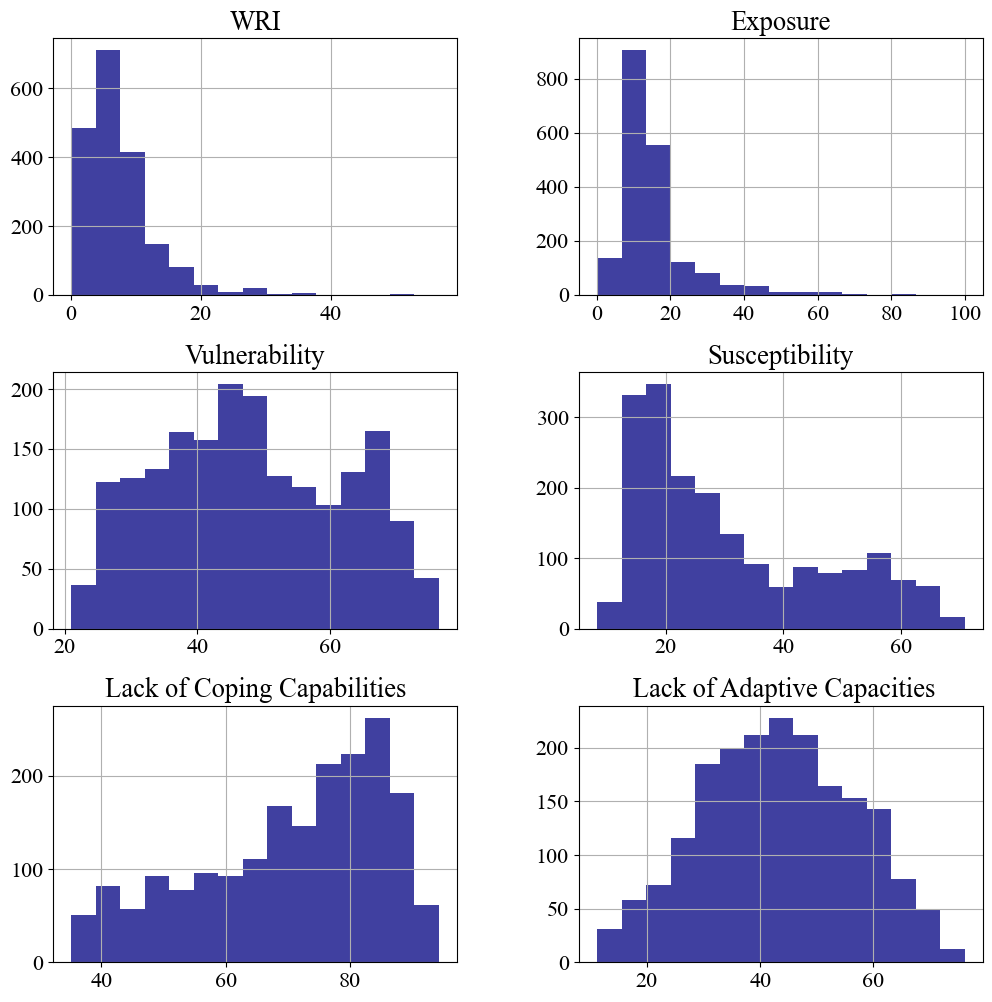

In [17]:
plt.style.use({'figure.figsize': (12, 12)}) # set the figure size for a plot
disaster_risk.hist(bins = 15, color = 'navy', alpha = 0.75) # histogram is divided into 15 bins
plt.show()

<b>KDE Plot: Depicts the probability density function of the continuous / non-parametric variables

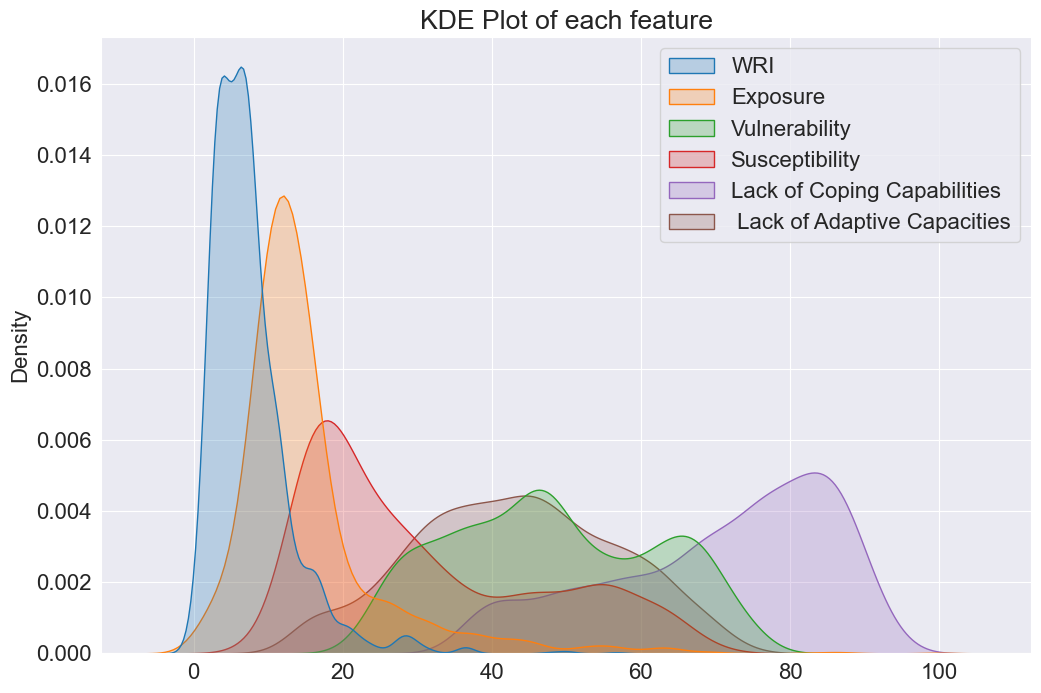

In [18]:
plt.style.use({'figure.figsize': (12, 8)})
var = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', ' Lack of Adaptive Capacities'] # define param
sns.set_style("darkgrid") # set the visual style of the plots to "darkgrid"
sns.kdeplot(data = disaster_risk[var], fill = True) # generate kde plot for different features
plt.title('KDE Plot of each feature')
plt.show()

<b>Box Plot: Compare the distribution of numeric variables across different categories

Text(0.5, 1.0, 'Box Plot for showing distribution of each variables')

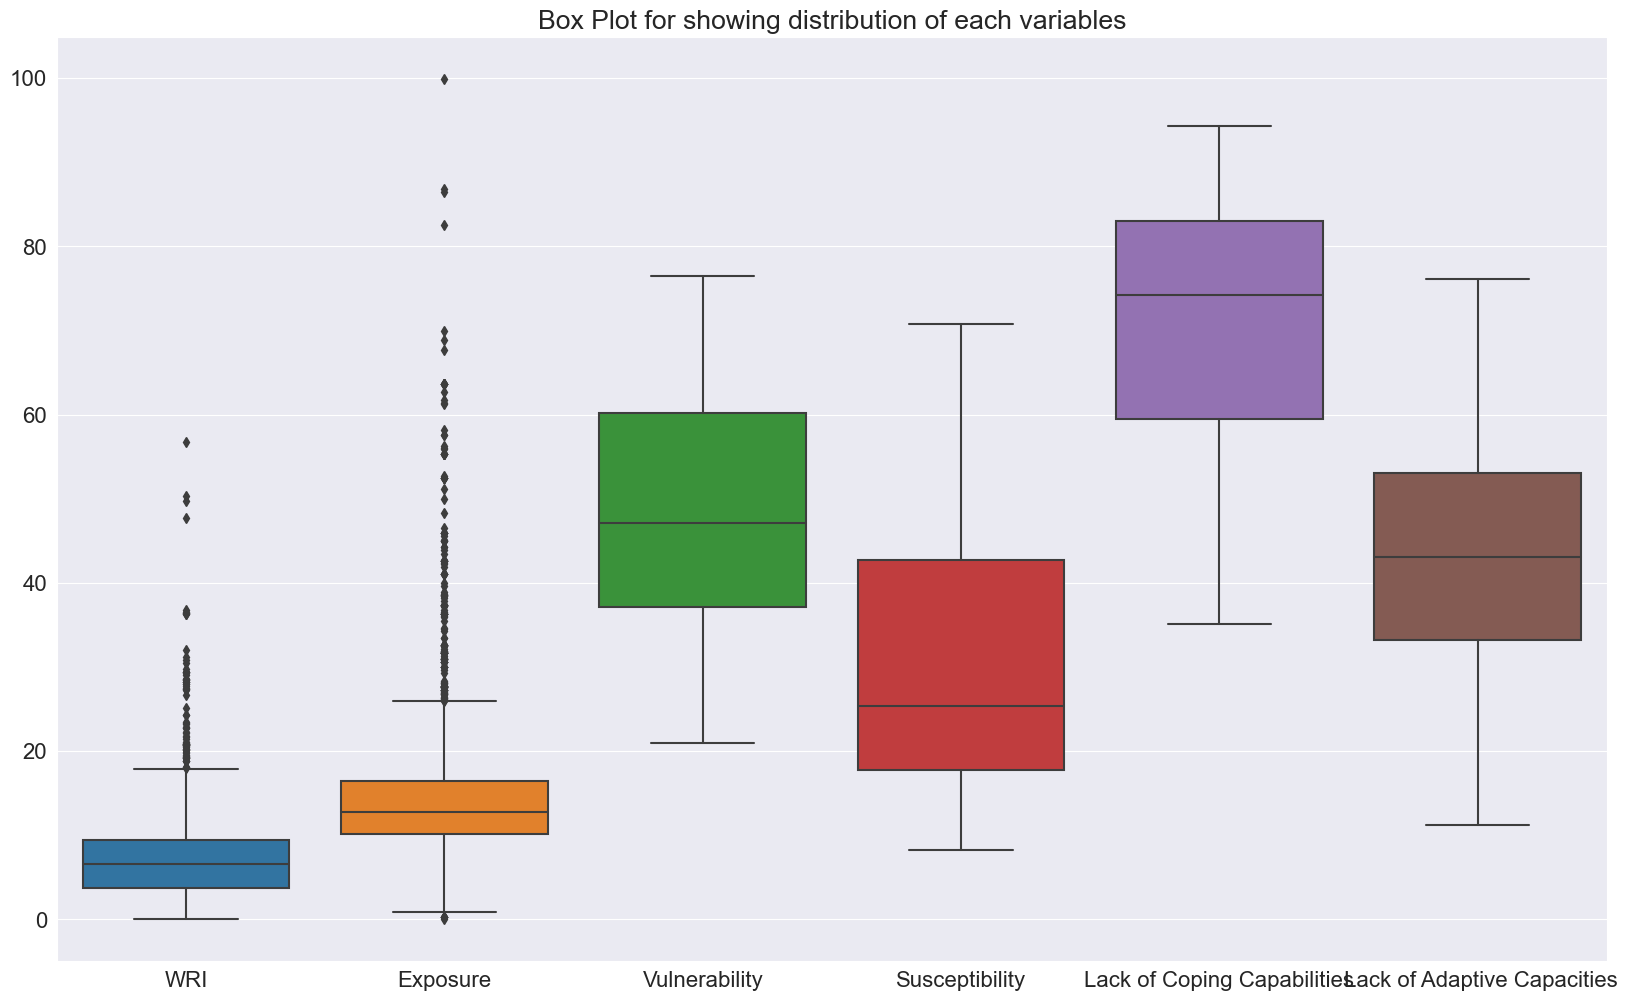

In [19]:
plt.style.use({'figure.figsize': (20, 12)})
var = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', ' Lack of Adaptive Capacities']
sns.set_style("darkgrid") # set the visual style of the plots to "darkgrid"
sns.boxplot(data = disaster_risk[var]) # generate box plot
plt.title('Box Plot for showing distribution of each variables')

<b>Violin Plot: Display the density of the data at different values

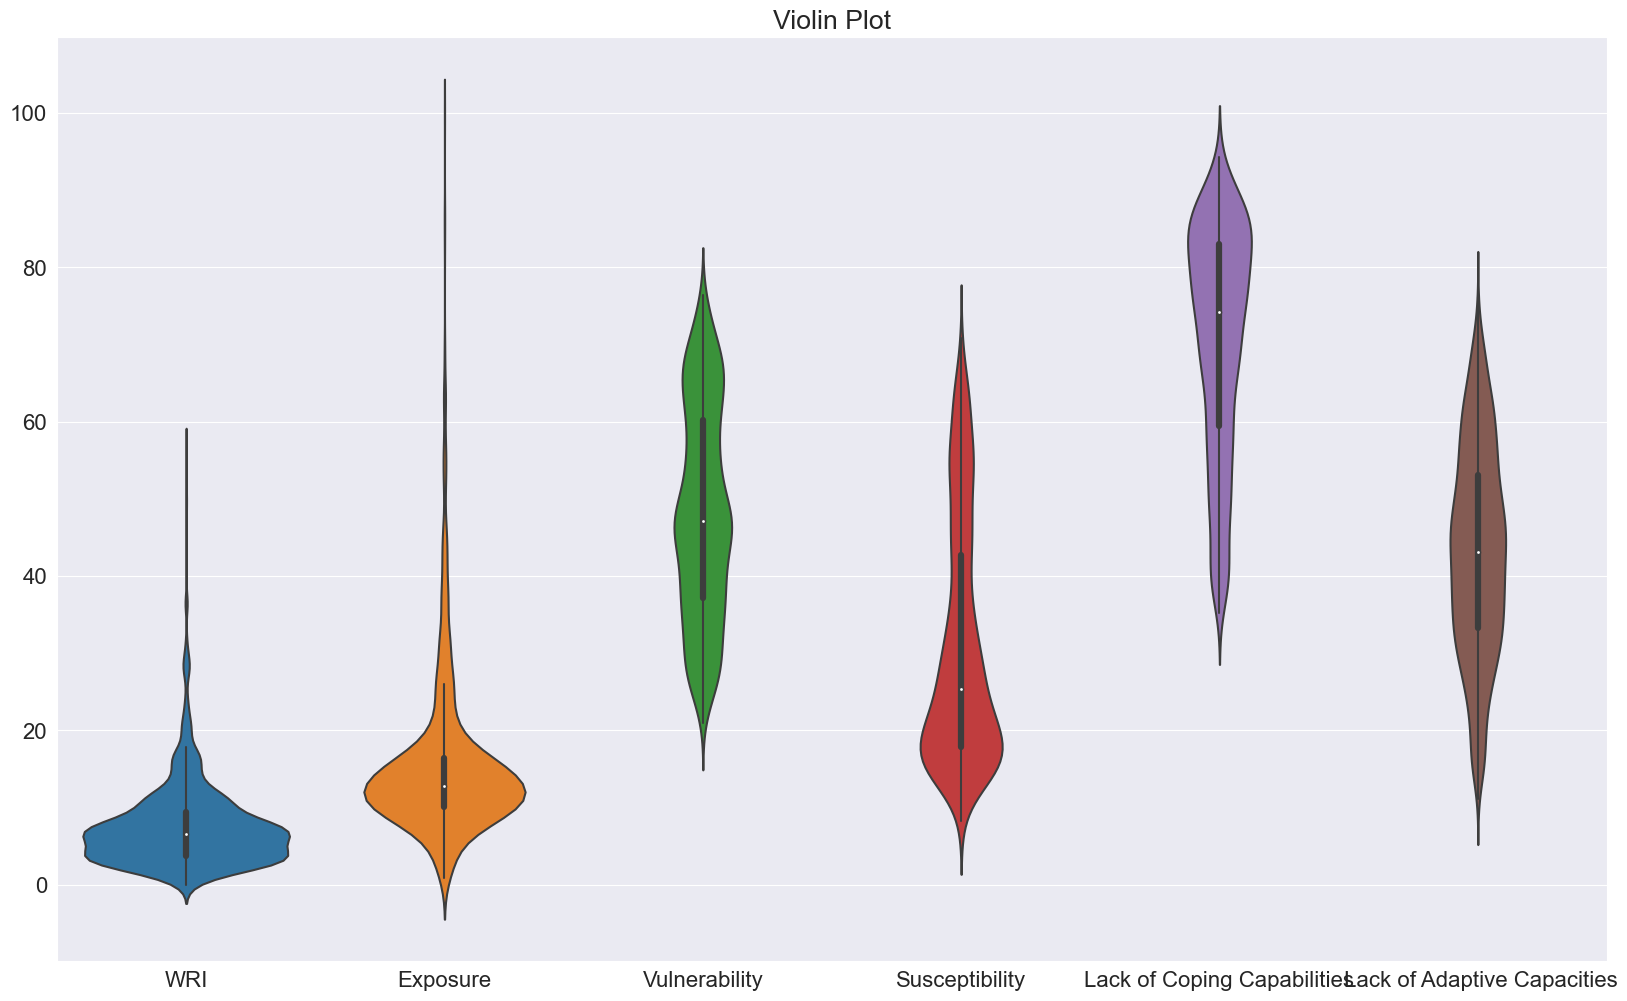

In [20]:
plt.style.use({'figure.figsize': (20, 12)})
var = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', ' Lack of Adaptive Capacities']
sns.set_style("darkgrid") # set the visual style of the plots to "darkgrid"
sns.violinplot(data = disaster_risk[var]) # generate violin plot
plt.title('Violin Plot')
plt.show()

<b>Box Plot

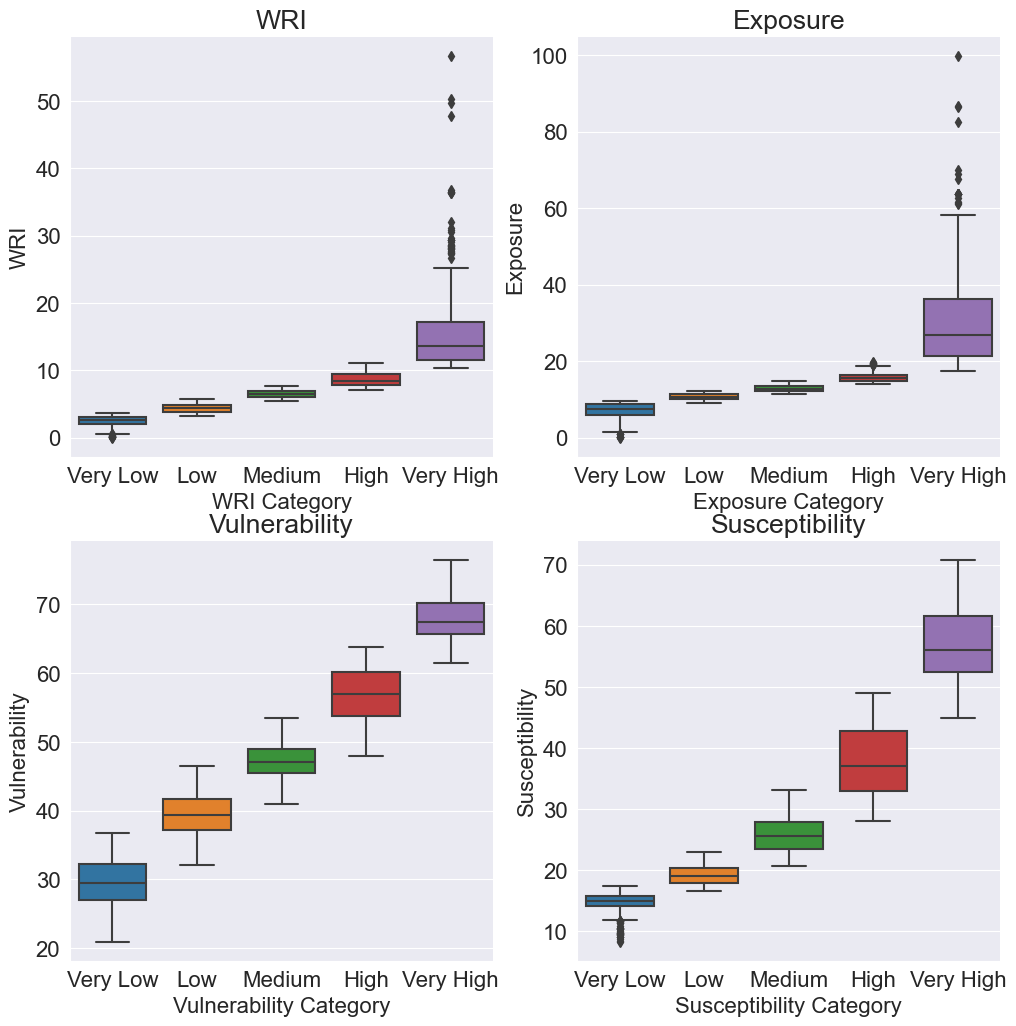

In [21]:
var = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility']
fig, ((a, b), (c, d)) = plt.subplots (2, 2, figsize = (12, 12)) # create a 2x2 grid of subplots (the top left subplot is represented by the 'a')
sns.set_style("darkgrid") # set the visual style of the plots to "darkgrid"

for i, t in zip(var, [a,b,c,d]): # iterate over both var and [a,b,c,d] simultaneously
    sns.boxplot(x = i + ' Category', y = i, data = disaster_risk.sort_values(by = i), ax = t)
    t.set_title(i)

sns.despine() # automatically take away the top and right spines

<b>Violin Plot

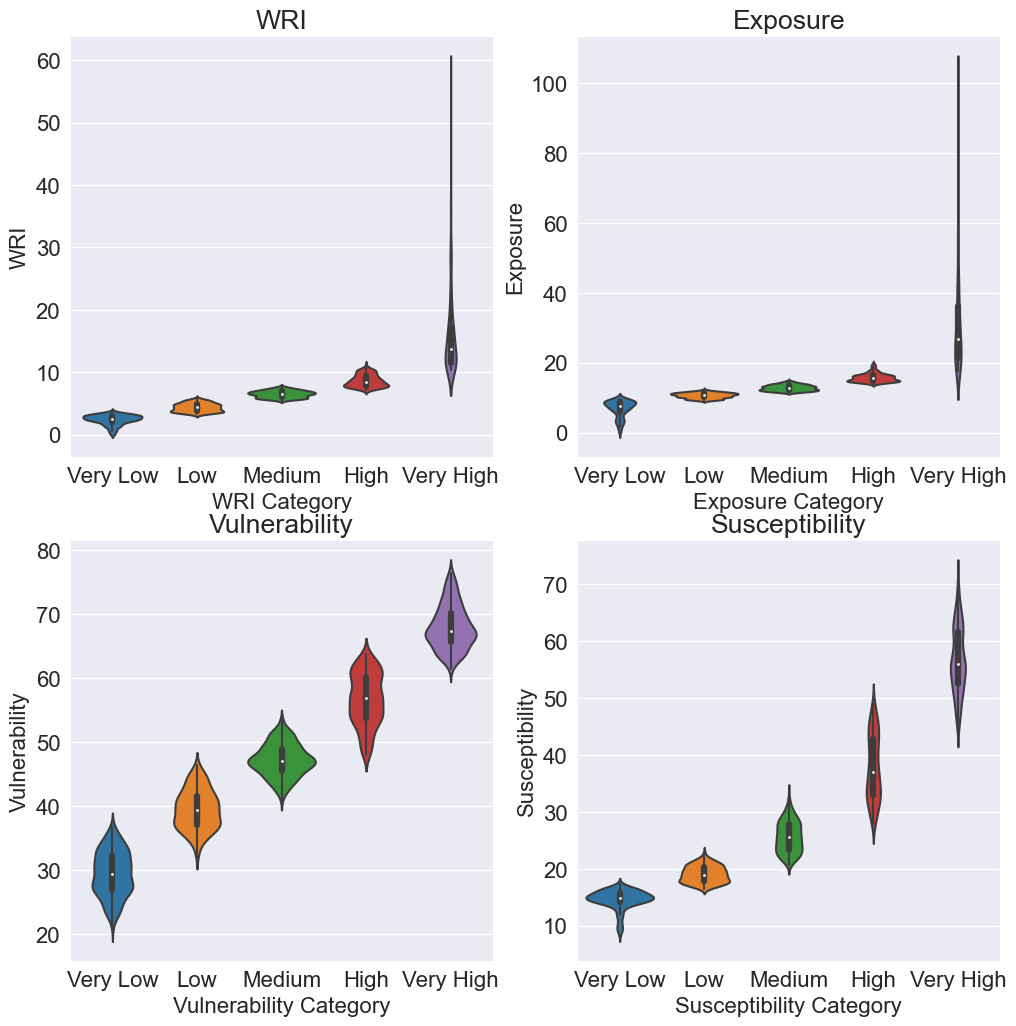

In [22]:
var = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility']
fig, ((a, b), (c, d)) = plt.subplots (2, 2, figsize = (12, 12))
sns.set_style("darkgrid")

for i, t in zip(var, [a,b,c,d]):
    sns.violinplot(x = i + ' Category', y = i, data = disaster_risk.sort_values(by = i), ax = t)
    t.set_title(i)

sns.despine() # take away the top and right spines

# 4. Analysis

### <b> 4.1 For Question: What are correlations between different variables like?</b><a class="anchor" id="41-for-question-what-are-correlations-between-different-variables-like"></a>
<p> To get the correlations of between different variables.  There are a lot of measures. Firstly, making the data visuable as pairs is a good start to find the correlations.  

4.1.1 <b>Pair Plot: Visualize pairwise relationships between multiple variables

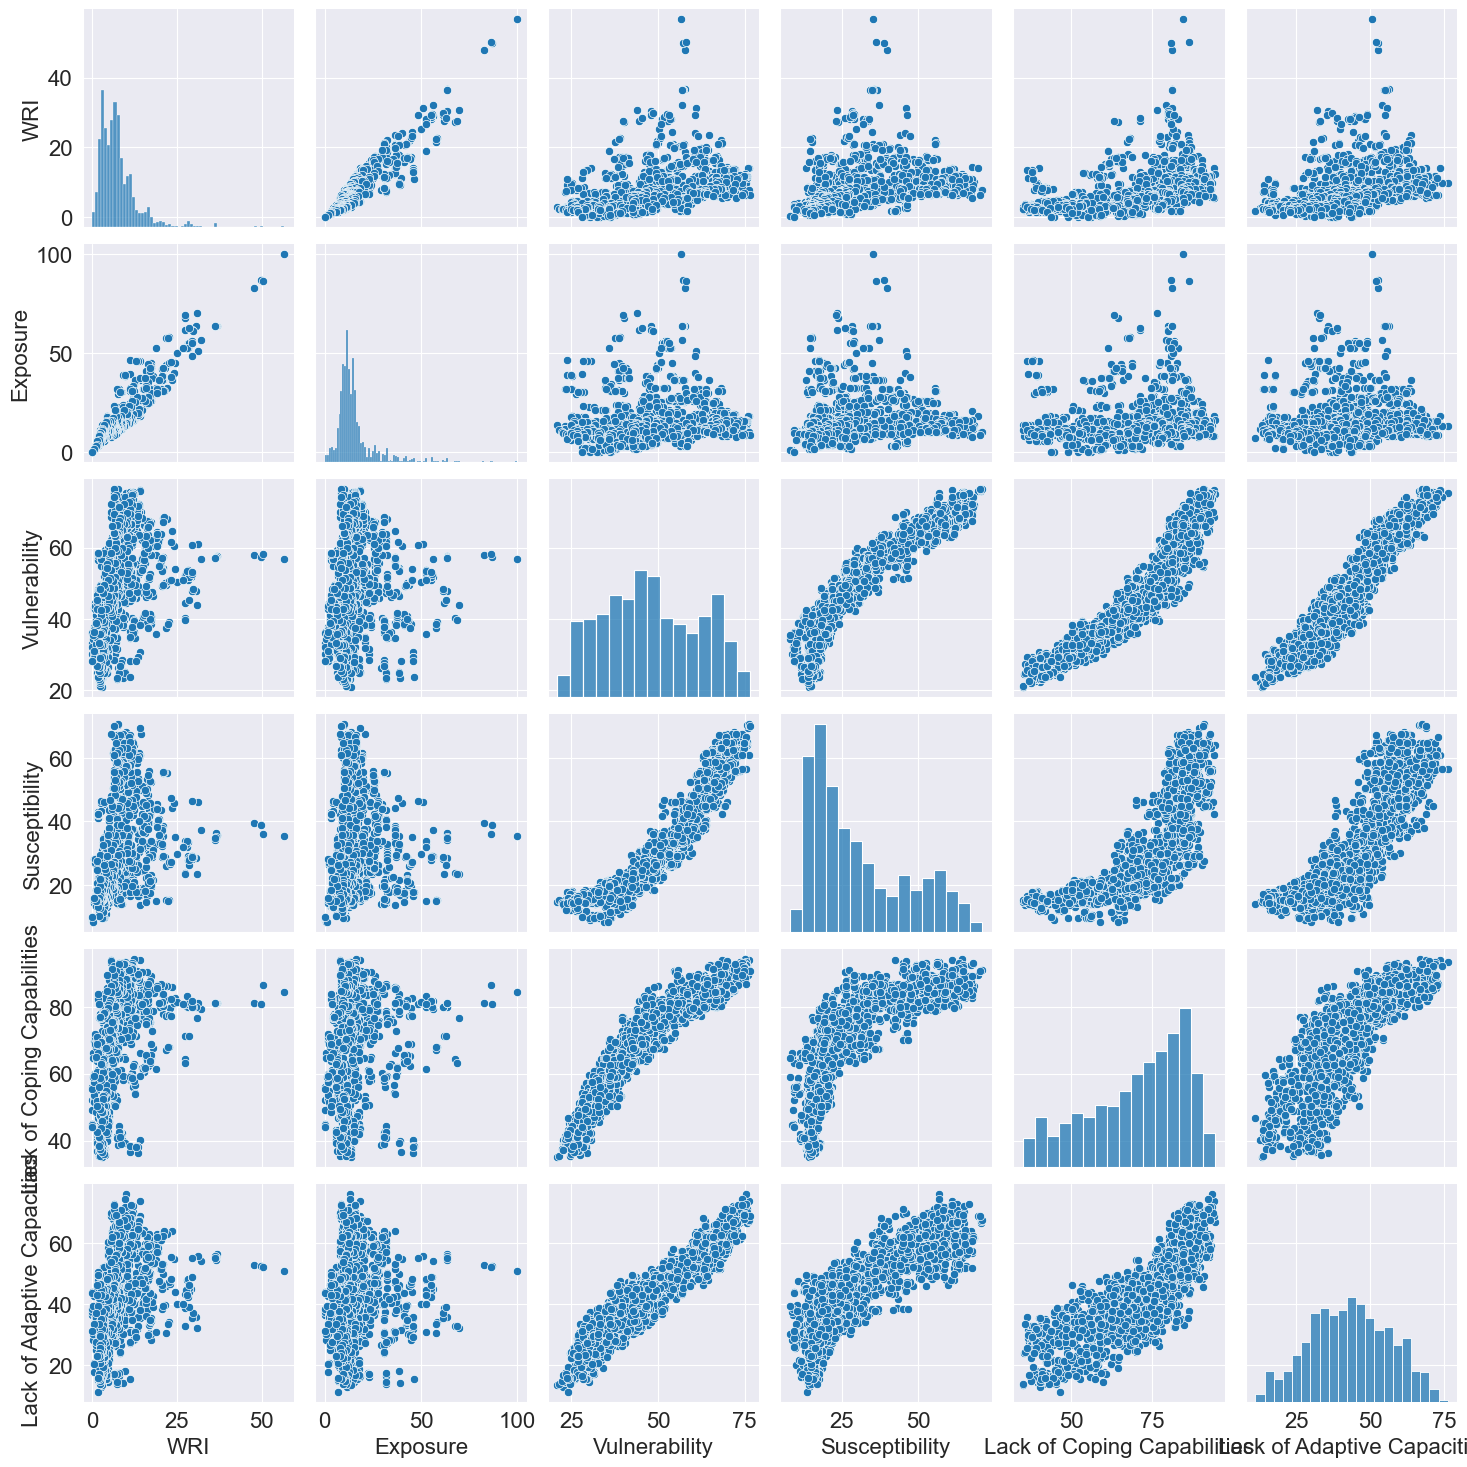

In [23]:
plt.style.use({'figure.figsize': (20, 12)})
sns.pairplot(disaster_risk) # scatterplot of pairwise relationships between variables
# Scatter Plot: Examine the relationship between two numeric variables

4.1.2 <b>lmplot: Generate linear models between two variables along with their confidence intervals

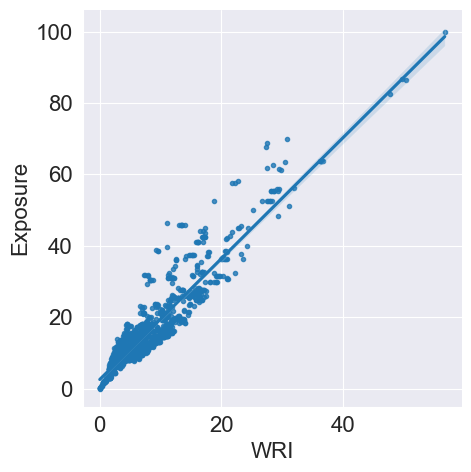

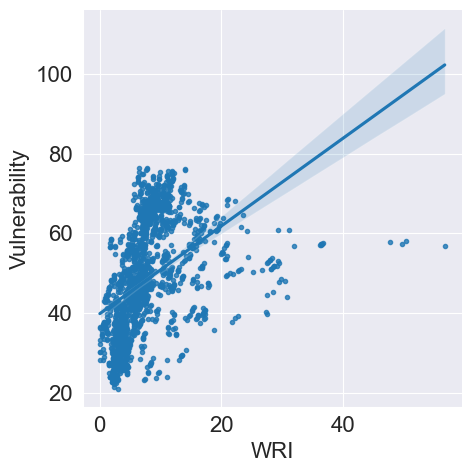

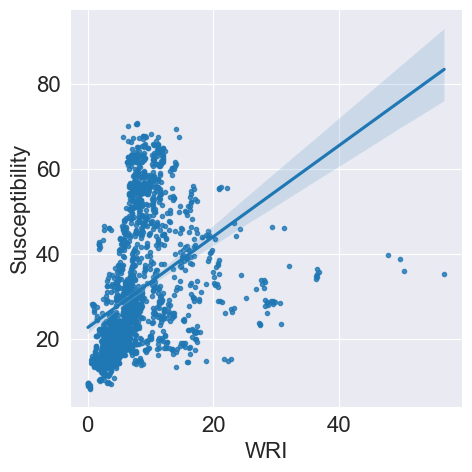

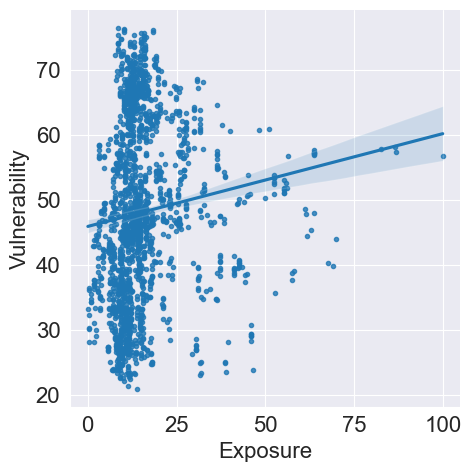

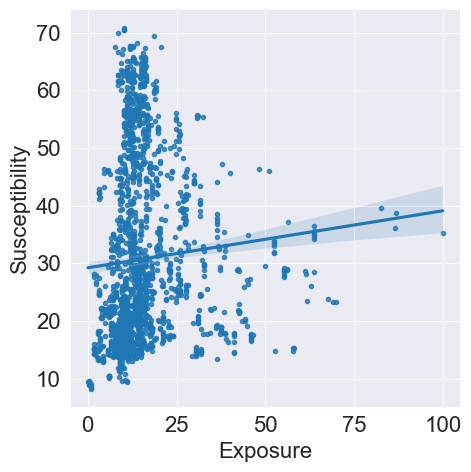

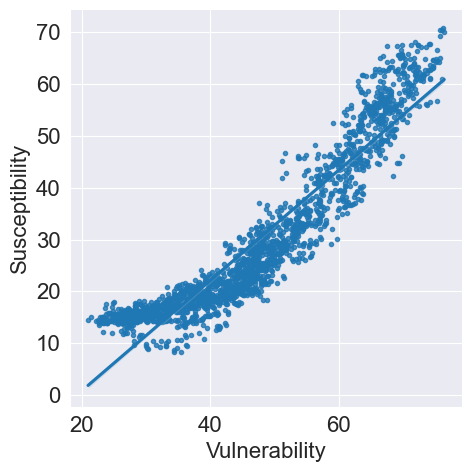

In [24]:
plt.style.use({'figure.figsize': (8, 8)})
sns.set_style("darkgrid")

data = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility'] # init variables
pairs = [] # init empty list

for i in range(len(data)):
    for j in range(i + 1, len(data)): # each pair of elements is only counted once and avoid duplicates
        pairs.append((data[i], data[j])) # create a list of pairs of elements from 'data'
for pair in pairs:
    sns.lmplot(x = pair[0], y = pair[1], data = disaster_risk, markers = '.') # generate lmplot for each pair of variables

plt.show()

<p>Observation of plots above:

<ul>
    <li>WRI may be highly positively correlated with Exposure.</li>
    <li>Vulnerability may be positively correlated with Susceptibility, Lack of Coping Capabilities and Lack of Adaptive Capacities</li>
    <li>Suscepitibility may be positively corelated with Lack of Coping Capabilities and Lack of Adaptive Capacities. </li>
    <li>There may not be littLe correlation between lack of Coping Capabilities and Lack of Adaptive Capacities.</li>
    <li>There may be little correlation between Exposure and sucepitibility</li>
</ul>

4.1.3 <b>Correlation Table

In [25]:
disaster_risk.corr(numeric_only = True, method ='pearson') # dependency between different variables
# numeric_only = True: only the mode of numeric columns is computed, and columns of other data types are ignored
# calculate the Pearson correlation coefficient

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities
WRI,1.000000,0.917721,0.443866,0.379829,0.457135,0.412014
Exposure,0.917721,1.000000,0.106199,0.064749,0.147265,0.086868
Vulnerability,0.443866,0.106199,1.000000,0.936216,0.930511,0.945103
Susceptibility,0.379829,0.064749,0.936216,1.000000,0.783973,0.838253
Lack of Coping Capabilities,0.457135,0.147265,0.930511,0.783973,1.000000,0.831824
Lack of Adaptive Capacities,0.412014,0.086868,0.945103,0.838253,0.831824,1.000000


<p>Observation of Correlation Table:

<ul>
    <li>WRI is highly positively correlated with Exposure, which means that regions with higher disaster exposure have higher risk scores</li>
    <li>Correlation coefficient between Exposure and Lack of Adaptive Capacities is close to 0, which means that they're basically unrelated</li>
    <li>Vulnerability is highly positively correlated with Susceptibility, Lack of Coping Capabilities and Lack of Adaptive Capacities</li>
    <li>There's little correlation between variables Susceptibility and Exposure</li>
</ul>

<p>* The Pearson correlation coefficient is a measure of the linear relationship between two variables. It takes values between -1 and 1, where 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no correlation.
<br>

4.1.4 <b>Heatmap: Visualize the correlation between different variables

<Axes: >

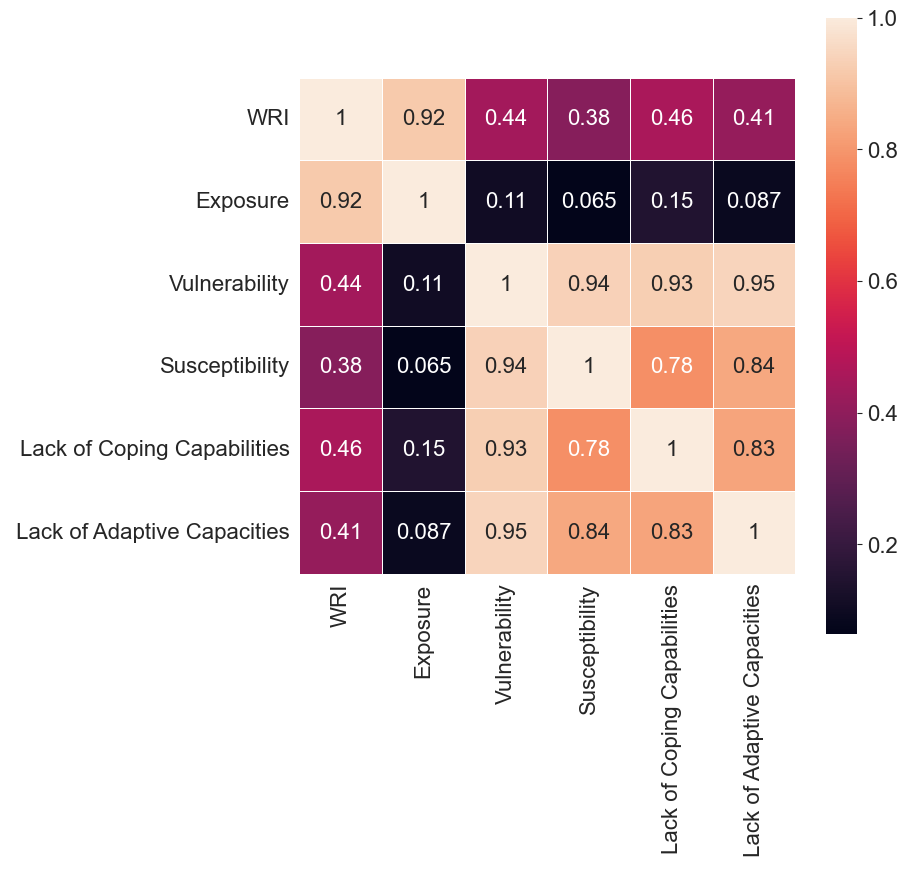

In [26]:
# heat map of correlation coefficients between variables
plt.style.use({'figure.figsize': (8, 8)})
sns.heatmap(disaster_risk.corr(numeric_only = True), square = True, annot = True, linewidths = 0.5) # generate heatmap

Observation of heatmap:
<p>This figure more directly shows the number of correlations of each pair of features. 

### <b> 4.2 t-Test<a class="anchor" id="42-t-test"></a>

In [27]:
disaster_risk['Year'] = disaster_risk['Year'].astype('str') # convert the data type of 'Year' from integer to string

4.2.1 <b>One sample t-Test</b>

<p>Check if the average value of global WRI for YA 2011 is 7.6

In [28]:
from scipy import stats # provide statistical functions and tests for data analysis
print(stats.ttest_1samp(disaster_risk[disaster_risk['Year'] == '2011']['WRI'], popmean = 7.6))
print(stats.ttest_1samp(disaster_risk[disaster_risk['Year'] == '2011']['WRI'], popmean = 7.0))

TtestResult(statistic=-0.013103210792661515, pvalue=0.9895606357573331, df=172)
TtestResult(statistic=1.568423859298565, pvalue=0.11862011214061265, df=172)


<p>Observation:

<ul>
    <li>statistic (-0.013103210792661515) is the t-statistic computed for the test, which measures the difference between the sample mean and the hypothesized population mean, taking into account sample size and variability</li>
    <li>pvalue (0.9895606357573331) is the two-tailed p-value associated with the t-test and expresses the probability that the observed t-statistic is more extreme  than the computed statistic, assuming the null hypothesis (that the sample comes from a population with the assumed mean) is true</li>
    <li>df (172) is the degrees of freedom associated with the t-test and is calculated from the sample size to determine the appropriate t-distribution for the test</li>
    <li>When we set the popmean to 7.6, the calculated t-statistic is very small and the associated p-value is very high, indicating that there is no significant difference between the sample mean and the assumed population mean, suggesting that the sample may have come from overall</li>
</ul>

In [29]:
# Check if the average value of global WRI for YA 2021 is 7.9
print(stats.ttest_1samp(disaster_risk[disaster_risk['Year'] == '2021']['WRI'], popmean = 7.9))
print(stats.ttest_1samp(disaster_risk[disaster_risk['Year'] == '2021']['WRI'], popmean = 7.6))

TtestResult(statistic=-0.004494223320357446, pvalue=0.9964191176156966, df=180)
TtestResult(statistic=0.6377066353520682, pvalue=0.5244750361354238, df=180)


4.2.3 <b>Two sample t-Test</b>

<p>Determine whether the means of 'Lack of Coping Capabilities' of Vanuatu and Kambodscha are significantly different

In [30]:
stats.ttest_ind(a = disaster_risk[disaster_risk['Region'] == 'Vanuatu']['Lack of Coping Capabilities'],
                b = disaster_risk[disaster_risk['Region'] == 'Kambodscha']['Lack of Coping Capabilities'], 
                equal_var = True)

Ttest_indResult(statistic=-3.9989563933477954, pvalue=0.0008417836292361057)

In [31]:
print(np.var(disaster_risk[disaster_risk['Region'] == 'Vanuatu']['Lack of Coping Capabilities']))
print(np.var(disaster_risk[disaster_risk['Region'] == 'Kambodscha']['Lack of Coping Capabilities']))

3.381581818181822
5.943446913580247


<p>Observation:

<ul>
    <li>t-test statistic (-3.9989563933477954), which measures the difference between the means of the two groups, is large enough that it shows that the means of the two groups are significantly different from each other</li>
    <li>p-value (0.0008417836292361057) represents the probability that the observed t-statistic is as extreme as the statistic computed if the null hypothesis (the two groups have the same mean) is true, and since the p-value is much smaller than 0.05, we can reject the Null hypothesis of equal means</li>
    <li>There is a significant difference between the means of 'Lack of Coping Capabilities' of Vanuatu and Kambodscha</li>
</ul>

4.2.4 <b>Levene's Test</b>
<p>* Levene's test is less sensitive to departures from normality

In [32]:
stats.levene(disaster_risk[disaster_risk['Region'] == 'Peru']['WRI'],
              disaster_risk[disaster_risk['Region'] == 'China']['WRI'],
              disaster_risk[disaster_risk['Region'] == 'Cuba']['WRI'])

LeveneResult(statistic=4.28499974690592, pvalue=0.027501967546103498)

<p>Observation:

<ul>
    <li>The statistic is 4.28499974690592, and the p-value is 0.027501967546103498</li>
    <li>p-value is much less than 0.05, we can reject the null hypothesis and conclude that there is a significant difference in variances between the three groups</li>
</ul>

4.2.5 <b>ANOVA Test

In [33]:
stats.f_oneway(disaster_risk[disaster_risk['Region'] == 'Peru']['Susceptibility'],
              disaster_risk[disaster_risk['Region'] == 'China']['Susceptibility'],
              disaster_risk[disaster_risk['Region'] == 'Cuba']['Susceptibility'],
              disaster_risk[disaster_risk['Region'] == 'Zambia']['Susceptibility'])

F_onewayResult(statistic=118.76918854032893, pvalue=9.682344493033236e-14)

<p>Observation:

<ul>
    <li>F-value (F-statistic) is 118.76918854032893 and p-value is 9.682344493033236e-14, which is very close to zero</li>
    <li>It suggests that there is a statistically significant difference between the means of the four groups being compared</li>
</ul>

In [34]:
stats.f_oneway(disaster_risk[disaster_risk['Region'] == 'Peru']['WRI'],
              disaster_risk[disaster_risk['Region'] == 'China']['WRI'],
              disaster_risk[disaster_risk['Region'] == 'Cuba']['WRI'],
              disaster_risk[disaster_risk['Region'] == 'Zambia']['WRI'])

F_onewayResult(statistic=5.096273253213809, pvalue=0.007894107693301669)

<p>Observation:

<ul>
    <li>F-value (F-statistic) is 5.096273253213809 and p-value is 0.007894107693301669, which is less than 0.05</li>
    <li>It indicates that there is a statistically significant difference between the means of the groups being compared</li>
</ul>

4.2.6 <b>Welch Test

In [35]:
stats.ttest_ind(a = disaster_risk[disaster_risk['Region'] == 'Vanuatu']['Lack of Coping Capabilities'],
                b = disaster_risk[disaster_risk['Region'] == 'Kambodscha']['Lack of Coping Capabilities'], 
               equal_var = False)

Ttest_indResult(statistic=-3.8801901244690002, pvalue=0.0015619934046871577)

<p>Observation:

<ul>
    <li>statistic (-3.8801901244690002) measures the difference between the means of the two groups relative to the within-group variation, meaning that the difference between the two groups' means is relatively large compared to the within-group variation</li>
    <li>pvalue (0.0015619934046871577) is a measure of the evidence for the null hypothesis (equal means), since the p-value is less than the conventional threshold of 0.05, we can reject the null hypothesis, which means that there is a significant difference between the means of the two groups being compared</li>
</ul>

### <b> 4.3 Linear Regression <a class="anchor" id="43-linear-regression"></a>

4.3.1 <b>Linear regression with single predictor

In [36]:
import statsmodels.formula.api as smf # functions for fitting linear models, generalized linear models, and other types of models
from statsmodels.iolib.summary2 import summary_col # tools for generating summary tables and reports from statistical models

mod_1 = smf.ols('WRI ~ Vulnerability', data = disaster_risk) # Vulnerability as the predictor and WRI as the response
res_1 = mod_1.fit() # use fit() to fit the model to the data and obtain the result
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    WRI   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           4.05e-93
Time:                        16:35:19   Log-Likelihood:                -5781.1
No. Observations:                1912   AIC:                         1.157e+04
Df Residuals:                    1910   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0483      0.413     -2.536

<p>Observation:

<ul>
    <li>The dependent variable is WRI, the independent variable is Vulnerability</li>
    <li>Vulnerability is a statistically significant predictor of the WRI score, with coefficient of 0.1788 and p-value of 0.000, which means that each unit increase in vulnerability, the WRI score increases by 0.1788 units on average</li>
    <li>R-squared (0.197) suggests that vulnerability explains about 19.7% of the variation in WRI scores</li>
    <li>The intercept term has a coefficient of -1.0483 and p-value of 0.011, indicating that it is statistically significant</li>
    <li>When vulnerability is zero, the WRI score is expected to be -1.0483</li>
    <li>The Durbin-Watson statistic is 0.614, which means the positive autocorrelation</li>
    <li>The Jarque-Bera (JB) test shows that it's not normally distributed (p-value = 0.00), indicating that the model assumptions may not be met</li>
</ul>

In [37]:
print(summary_col([res_1], stars = True))


                  WRI   
------------------------
Intercept      -1.0483**
               (0.4134) 
Vulnerability  0.1788***
               (0.0083) 
R-squared      0.1970   
R-squared Adj. 0.1966   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


<p>Observation:

<ul>
    <li>There is a statistically significant positive relationship between Vulnerability and the WRI score</li>
    <li>For each one-unit increase in Vulnerability, the WRI score increases by 0.1788 units on average</li>
    <li>19.7% of the variance in the WRI score can be explained by Vulnerability</li>
    <li>The p-value of the F-statistic is less than 0.05, we can know that the overall model is statistically significant</li>
</ul>

In [38]:
mod_2 = smf.ols('WRI ~ Susceptibility', data = disaster_risk) # Susceptibility as the predictor and WRI as the response
res_2 = mod_2.fit() # use fit() to fit the model to the data and obtain the result
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    WRI   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     322.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.15e-66
Time:                        16:35:19   Log-Likelihood:                -5841.9
No. Observations:                1912   AIC:                         1.169e+04
Df Residuals:                    1910   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4144      0.259     13.

<p>Observation:

<ul>
    <li>The dependent variable is WRI, the independent variable is Susceptibility</li>
    <li>Susceptibility is a statistically significant predictor of the WRI score with coefficient of 0.1346, which means that each unit increase in vulnerability, the WRI score increases by 0.1346 units on average</li>
    <li>R-squared (0.144) suggests that vulnerability explains about 14.4% of the variation in WRI scores</li>
    <li>The intercept term has a coefficient of 3.4144 and p-value of 0.000, indicating that it is statistically significant</li>
    <li>When vulnerability is zero, the WRI score is expected to be 3.4144</li>
    <li>The Durbin-Watson statistic is 0.548, which means the positive autocorrelation</li>
</ul>

In [39]:
print(summary_col([res_2], stars = True))


                  WRI   
------------------------
Intercept      3.4144***
               (0.2590) 
Susceptibility 0.1346***
               (0.0075) 
R-squared      0.1443   
R-squared Adj. 0.1438   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


<p>Observation:

<ul>
    <li>There is a statistically significant positive relationship between Susceptibility and the WRI score</li>
    <li>For each one-unit increase in Susceptibility, the WRI score increases by 3.4144 units on average</li>
    <li>14.4% of the variance in the WRI score can be explained by Susceptibility</li>
    <li>The p-value of the F-statistic is less than 0.05, we can know that the overall model is statistically significant</li>
</ul>

4.3.2 <b>Linear regression with multiple predictors

In [40]:
# the dependent variable is WRI and the independent variables are Exposure, Vulnerability and Susceptibility
mod_3 = smf.ols('WRI ~ Exposure + Vulnerability + Susceptibility', data = disaster_risk)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    WRI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.693e+04
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:35:19   Log-Likelihood:                -2818.2
No. Observations:                1912   AIC:                             5644.
Df Residuals:                    1908   BIC:                             5667.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.8780      0.127    -54.

In [41]:
print(summary_col([res_3], stars = True))


                  WRI    
-------------------------
Intercept      -6.8780***
               (0.1270)  
Exposure       0.4765*** 
               (0.0024)  
Vulnerability  0.1572*** 
               (0.0050)  
Susceptibility -0.0151***
               (0.0044)  
R-squared      0.9638    
R-squared Adj. 0.9637    
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


### <b>4.4 Data Visualization for analysis

##### 4.4.1 <b>For question: How has the global disaster risk index changed over time? Are there any patterns or trends in the data</b><a class="anchor" id="441-for-question-how-has-the-global-disaster-risk-index-changed-over-time-are-there-any-patterns-or-trends-in-the-data"></a>
<p>Through the function meanWRI(), we can calculate and obtain the global WRI average mean_WRI from 2011 to 2021 and generate the following line chart. It can be seen that in the past 11 years, the global disaster risk index has fallen first (the lowest value in 2016) and then increased (the highest value in 2019), and finally stabilized at about 7.9 (2020 ~ 2021).

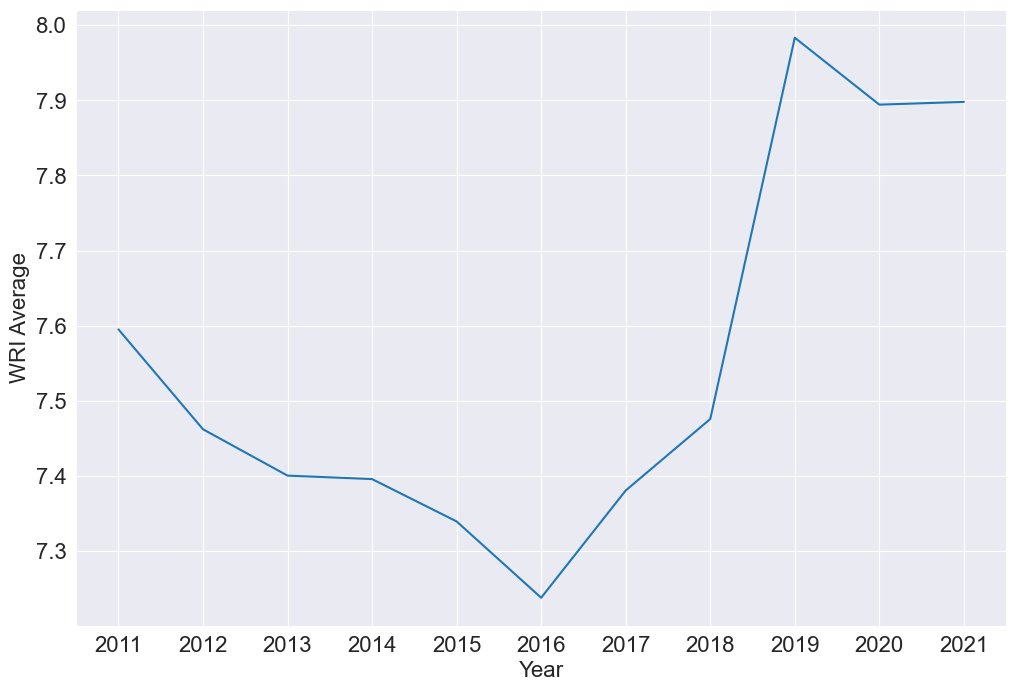

In [42]:
mean_WRI = []
var = np.sort(disaster_risk['Year'].unique())
# var = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

def meanWRI():
    for i in var:
        mean_WRI.append(np.mean(disaster_risk[disaster_risk['Year'] == i]['WRI']))
    plt.style.use({'figure.figsize': (12, 8)})
    plt.plot(var, mean_WRI)
    plt.xlabel('Year')
    plt.ylabel('WRI Average')
    plt.show()
meanWRI()

<b>Line Plot: Depict the relationship between continuous / categorical values in a continuous data point format

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


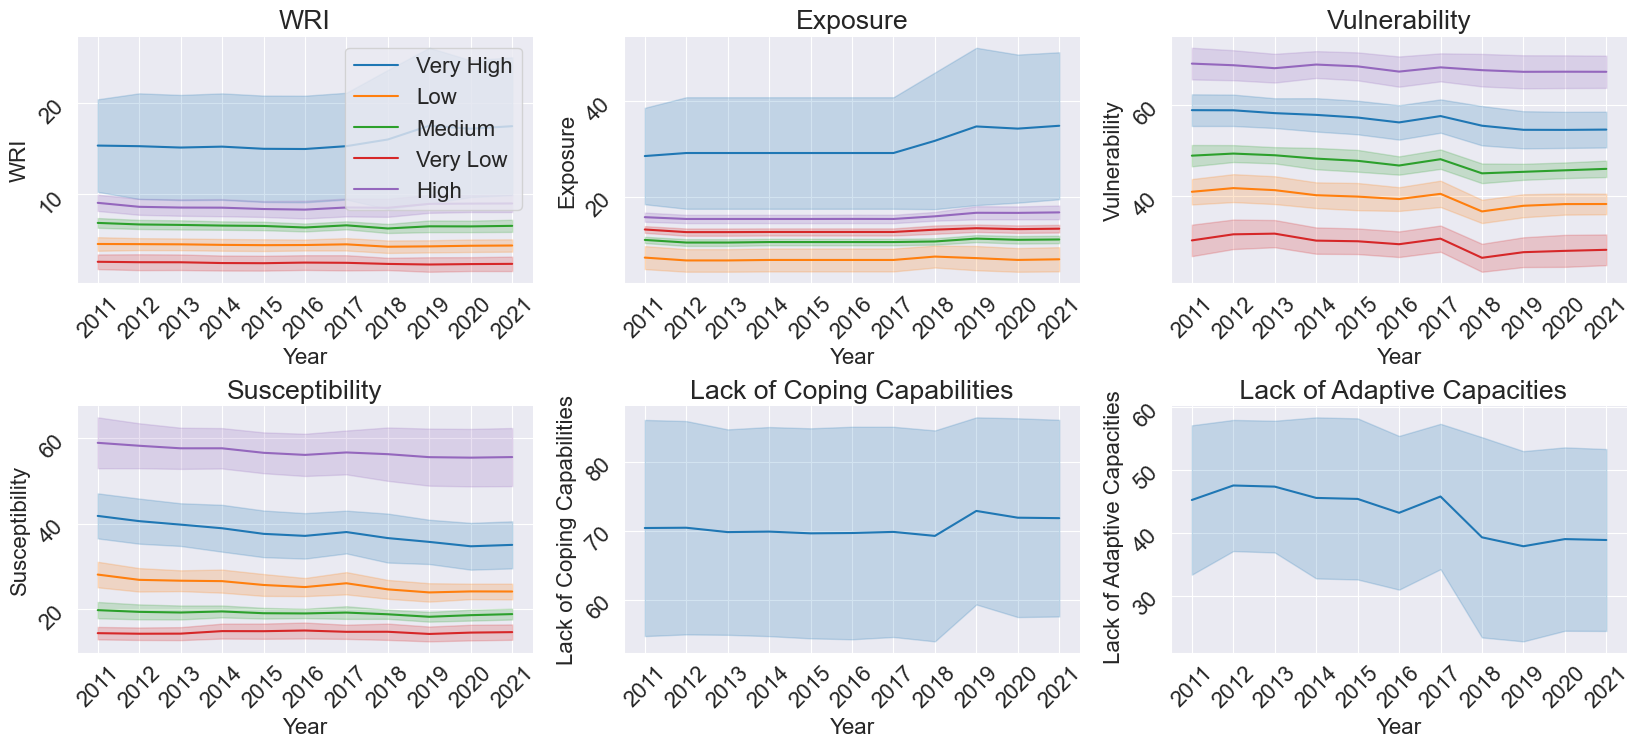

In [43]:
var = ['WRI','Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', ' Lack of Adaptive Capacities']
var_hue = ['WRI Category', 'Exposure Category', 'Vulnerability Category', 'Susceptibility Category', None, None]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 8))
plt.subplots_adjust(hspace = 0.5)

for ax, i, j in zip(axs.ravel(), var, var_hue):
    sns.lineplot(data = disaster_risk.sort_values(by = 'Year'), x = "Year", y = i, hue = j, markers = True, dashes = True, errorbar = 'sd', ax = ax)
    ax.set_title(i)
    ax.tick_params(labelrotation = 45)
    sns.despine()
    if(i != 'WRI'):
        ax.legend().set_visible(False)
    else:
        ax.legend()
sns.despine()

##### 4.4.2 <b>For Question: Which regions are most / least vulnerable to natural disasters</b><a class="anchor" id="442-for-question-which-regions-are-most--least-vulnerable-to-natural-disasters"></a>
<p>We use the function topRegions() to obtain the five regions with the highest WRI in the world from 2011 to 2020, and present them intuitively in the form of bar chart (multiple subplots). Additionally, We use the function bottomRegions() to obtain the five regions with the lowest WRI in the world from 2011 to 2020, and also present them intuitively in the form of bar charts.

<b>Most vulerable region to natural disasters

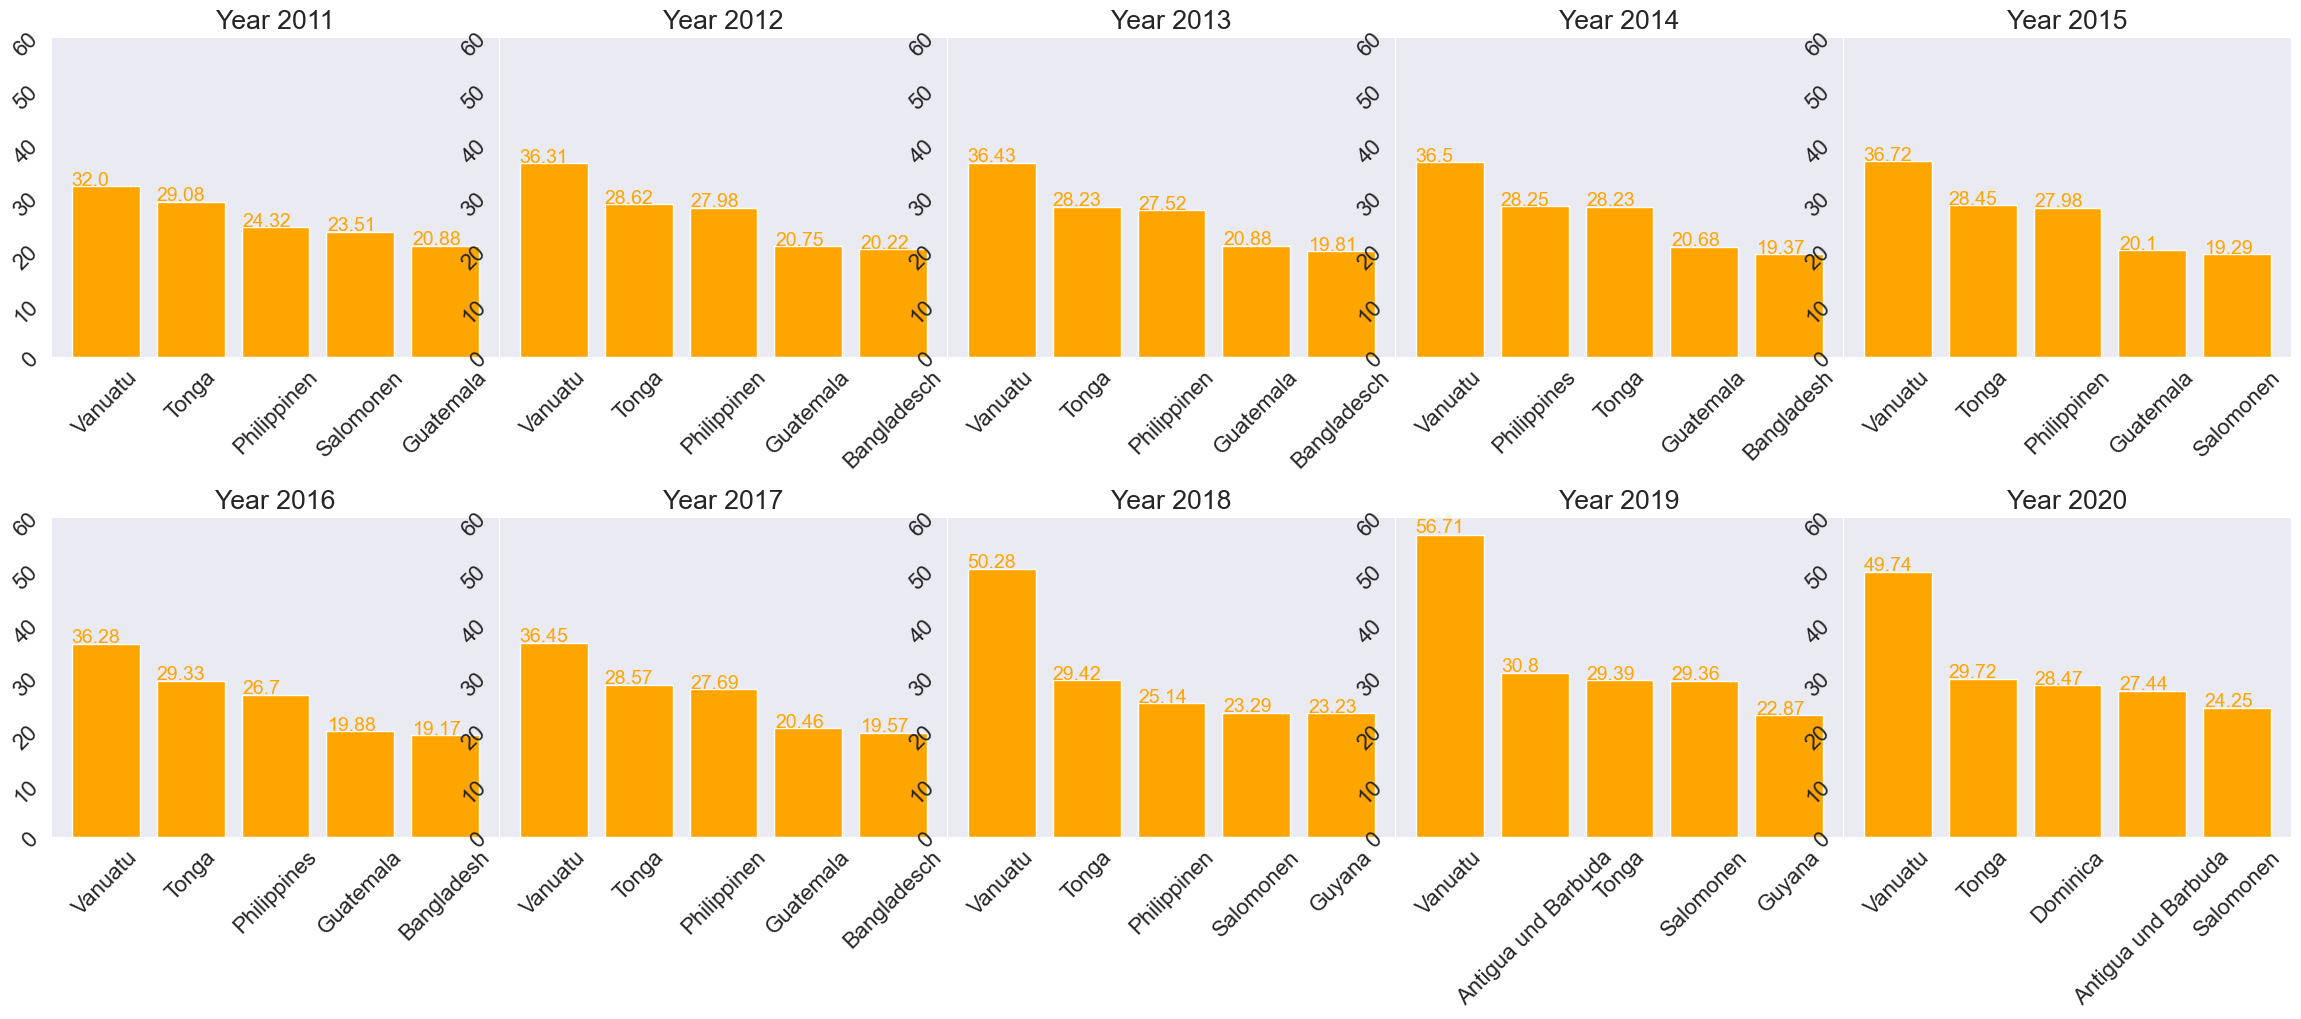

In [44]:
disaster_risk['Year'] = disaster_risk['Year'].astype('int64') # convert the data type of 'Year' from string to integer
year = np.sort(disaster_risk['Year'].unique()) # deal with the single column 'Year' and return all unique elements
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (28, 8))
plt.subplots_adjust(left = 0.2, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0.5)

def topRegions(year):
    return disaster_risk[disaster_risk['Year'] == year].sort_values(by = 'WRI')[::-1].head(5) # top 5 regions with highest WRI in the world

for sub, i in zip(axs.ravel(), year):
    sub.bar(topRegions(i)['Region'], topRegions(i)['WRI'], color = 'orange')
    sub.set_title('Year ' + str(i))
    sub.tick_params(labelrotation = 45)
    sub.set_ylim([0, 60])
    for p in sub.patches:
        sub.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005),color='orange', fontsize = 14)
    sub.grid()

plt.show()

As the figure above shows, <b> Vanuatu </b> has been the most vulnerable country with the highest WRI (World Risk Score) from 2011 to 2021.

<b> Least vunearable to natural disaster

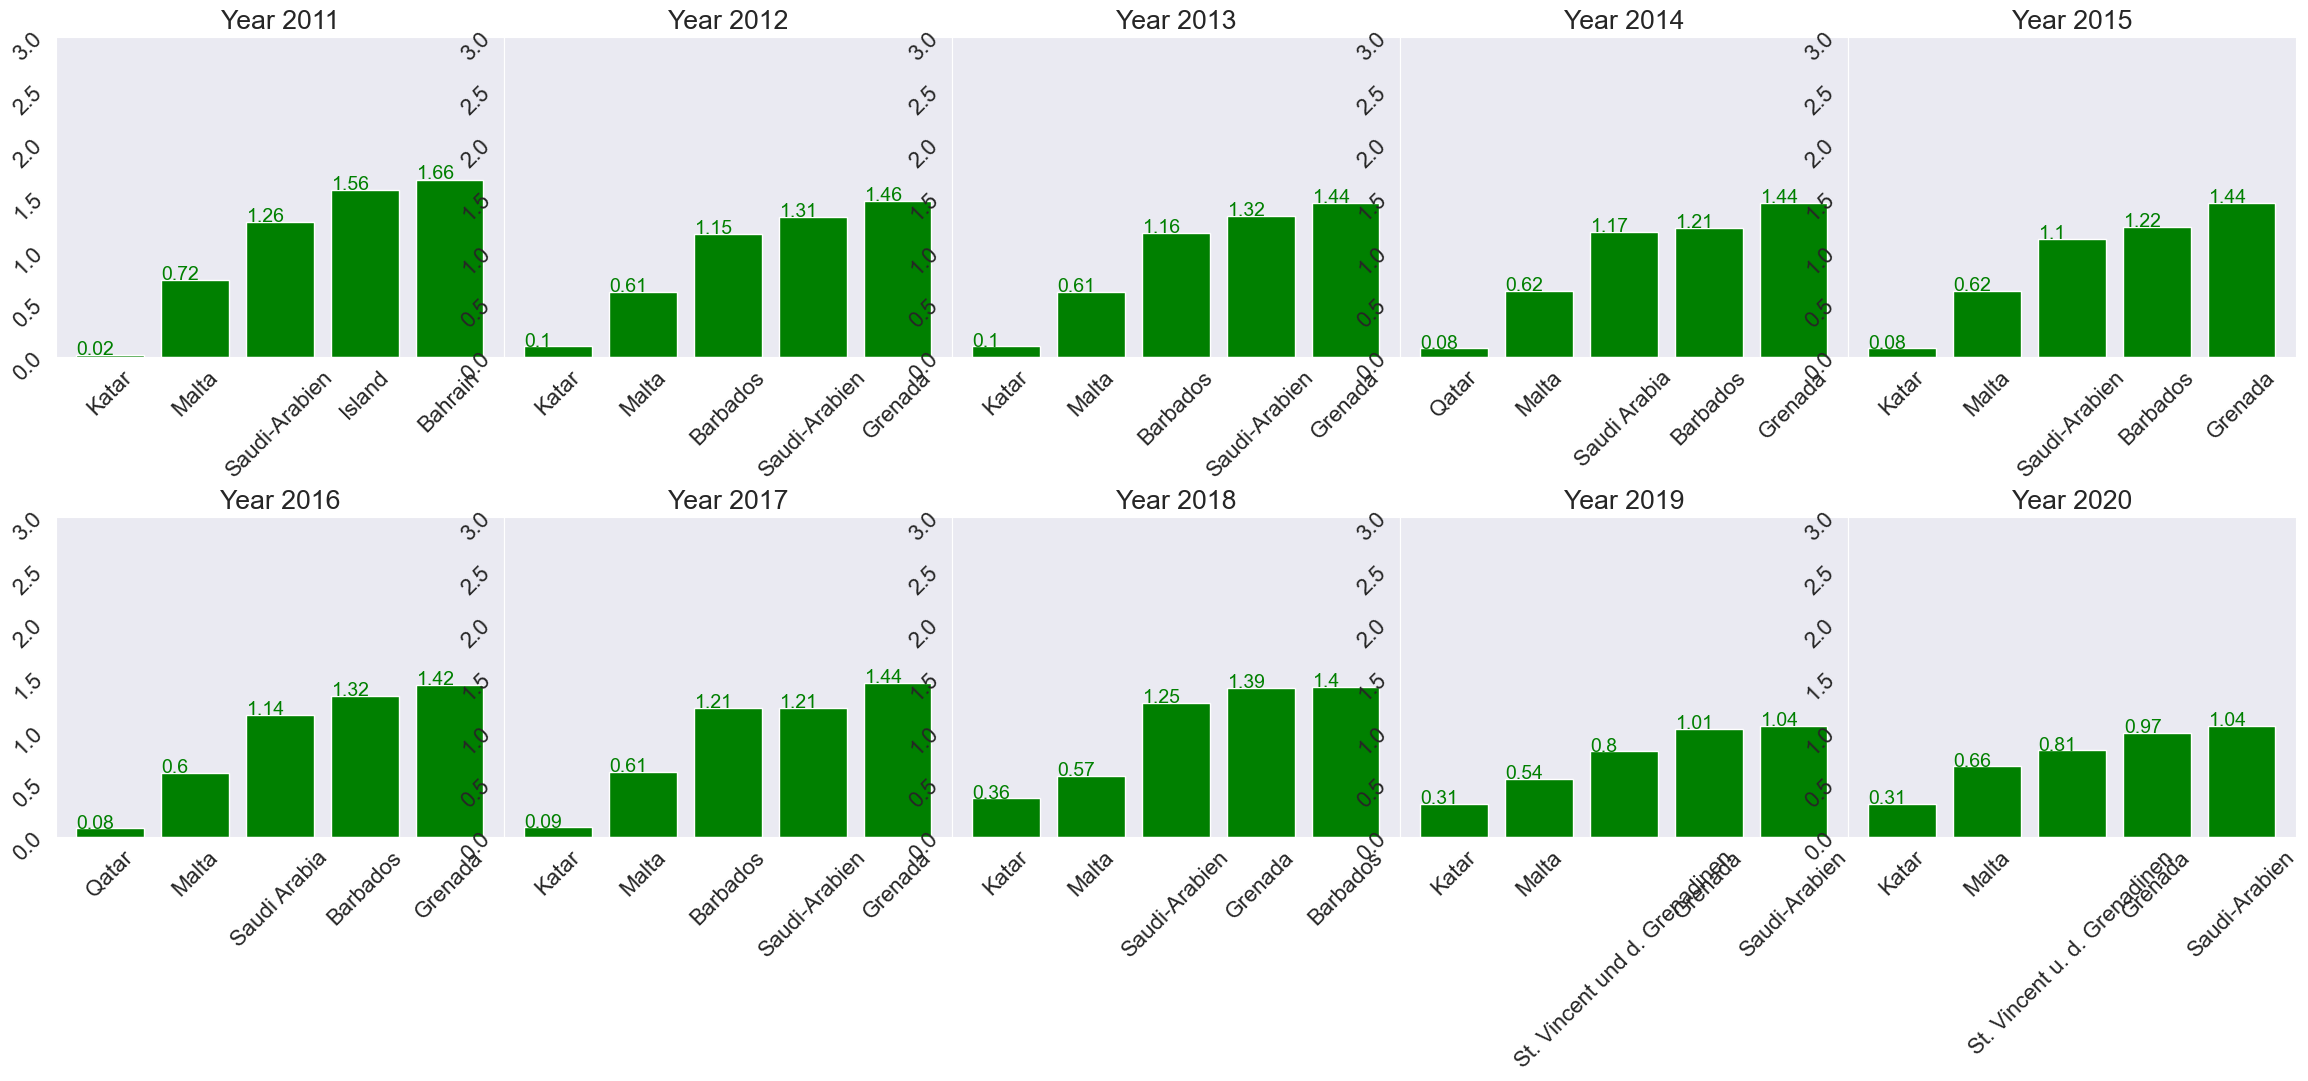

In [45]:
year = np.sort(disaster_risk['Year'].unique()) # deal with the single column 'Year' and return all unique elements
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (28, 8))
plt.subplots_adjust(left = 0.2, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0.5)

def bottomRegions(year):
    return disaster_risk[disaster_risk['Year'] == year].sort_values(by = 'WRI').head(5) # bottom 5 regions with lowest WRI in the world

for sub, i in zip(axs.ravel(), year):
    sub.bar(bottomRegions(i)['Region'], bottomRegions(i)['WRI'], color = 'green')
    sub.set_title('Year ' + str(i))
    sub.tick_params(labelrotation = 45)
    sub.set_ylim([0, 3])
    for p in sub.patches:
        sub.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005),color='green', fontsize = 14)
    # sub.axes.get_yaxis().set_ticks([])
    sub.grid()

plt.show()

As the figure above shows, Qatar(Katar) has been the least vulnerable regiion with the loweast WRI (World Risk Score) from 2011 to 2021.

### <b> 4.5 Machine learning models to predict likelihood</b><a class="anchor" id="45-machine-learning-models-to-predict-likelihood"></a>
<b>be trained to predict the likelihood of a region experiencing a natural disaster (based on historical data)

<b>Feature selection</b>

<ul>
    <li>Use the variable that are strongly correlated with the target variable as feature variable</li>
    <li>Select features by correlation coefficient method</li>
</ul>

In [46]:
disaster_risk.corr(numeric_only = True, method ='pearson') # dependency between different variables

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
WRI,1.000000,0.917721,0.443866,0.379829,0.457135,0.412014,0.027415
Exposure,0.917721,1.000000,0.106199,0.064749,0.147265,0.086868,0.062798
Vulnerability,0.443866,0.106199,1.000000,0.936216,0.930511,0.945103,-0.080170
Susceptibility,0.379829,0.064749,0.936216,1.000000,0.783973,0.838253,-0.054543
Lack of Coping Capabilities,0.457135,0.147265,0.930511,0.783973,1.000000,0.831824,0.041470
Lack of Adaptive Capacities,0.412014,0.086868,0.945103,0.838253,0.831824,1.000000,-0.228237
Year,0.027415,0.062798,-0.080170,-0.054543,0.041470,-0.228237,1.000000


<b>Construct the features of the training dataset

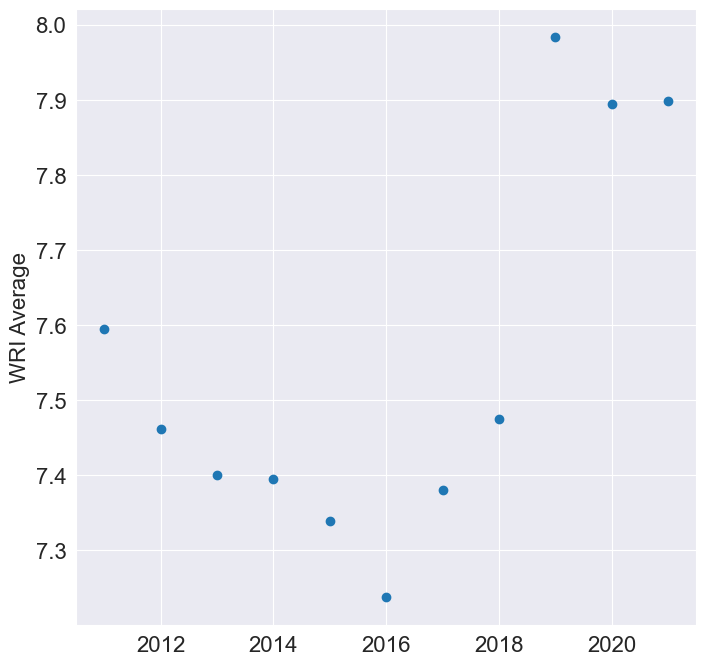

In [47]:
mean_WRI = []
var = np.sort(disaster_risk['Year'].unique())
# var = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for i in var:
    mean_WRI.append(np.mean(disaster_risk[disaster_risk['Year'] == i]['WRI']))
plt.style.use({'figure.figsize': (8, 8)})
plt.scatter(var, mean_WRI) # generate scatter plot for two vars to observe correlation
plt.ylabel('WRI Average')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression # import the LinearRegression class from the scikit-learn library

# create new NumPy arrays model_arr1/model_arr2 by reshaping it into a 2-dimensional array with a single column
model_arr1 = np.array(var).reshape(-1, 1)
model_arr2 = np.array(mean_WRI).reshape(-1, 1)
my_model = LinearRegression() # create the linear regression model

ind = model_arr1.tolist() # converts the array model_arr1 to list ind
dep = model_arr2.tolist() # converts the array model_arr2 to list dep
my_model.fit(ind, dep) # fit the machine learning model to the input var 'ind' and target var 'dep'

my_model.intercept_ # retrieve the intercept of the trained linear regression model
for years in range(2022, 2030):
    print(my_model.predict([[years]]), end = '')

[[7.83432872]][[7.88154137]][[7.92875401]][[7.97596666]][[8.02317931]][[8.07039196]][[8.1176046]][[8.16481725]]

Interpretation:
<p>The arguments should be both 2-dimensional array-like objects
<p>After the model has been trained, it can be used to make predictions on new data (WRI) through the predict() method

In [ ]:
my_model.score(ind, dep) # calculate the coefficient of determination (R-squared) of my_model
my_model.coef_ # retrieve the correlation coefficient of the trained linear regression model

array([[0.04721265]])

Interpretation:
<p>R-squared represents the proportion of variance in the target variable that can be explained by the input features. It ranges from 0 to 1, and 1 indicates that the model explains all of the variability in the target variable

### <b> 4.6 Other analysis <a class="anchor" id="46-other-analysis"></a>

#### Standard deviation </b>

In [48]:
var_sd = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility']
for i in var_sd:
    print('Standard deviation of',i,': ', np.std(disaster_risk[i]))

Standard deviation of WRI :  5.552982014873959
Standard deviation of Exposure :  10.243665430305917
Standard deviation of Vulnerability :  13.788615863184447
Standard deviation of Susceptibility :  15.664737379926004


# 5. Conclusion / Findings

<b>Discussion of the results</b>

We mention a few questions in the introduction part. After we do a lot of analysis we have a few findings below:

1.Vanuatu has been the most vunearable region to natural disaster from 2011 to 2021. On the opsite side, Qatar(Katar) has been the least vunerable region frome 2011 to 2021.

2.The correlation withe diffearen features like below
<ul>
    <li>WRI is highly positively correlated with Exposure, which means that regions with higher disaster exposure have higher risk scores</li>
    <li>Correlation coefficient between Exposure and Lack of Adaptive Capacities is close to 0, which means that they're basically unrelated</li>
    <li>Vulnerability is highly positively correlated with Susceptibility, Lack of Coping Capabilities and Lack of Adaptive Capacities</li>
    <li>There's little correlation between variables Susceptibility and Exposure</li>
</ul>

1. The global disaster risk change have no obvious or direct connection in the decade. Maybe this question requires more historical data to support.The conclusion concluded from the line plot and the the figure of mean WRI from 2011 to 2021.

4.

<b>Conclusion</b>

<p># Conclusion of the dataset analysis report

# Marking Criteria out of 50
<ul>
    <li> Introduction / Objective or purpose (5) </li>
    <li> Dataset Description and reference (5) </li>
    <li> Some descriptive information (10) </li>
    <li> Analysis (20) </li>
    <li> Conclusion / findings (10) </li>
</ul>
<p>The Notebook needs to be well structured and easy to read or follow. Otherwise, max of 10 penalty marks might be deducted.